## Observations and Insights

1- The capomulin and ramicane drug regimens in comparision to infubinol and ceftamin were more effective and the size of tomur valume Significantly smaller. 

2- The drugs Capomulin was effective in reducing the spread of cancer cells. 
At the end of the 45-day course treatment, mice I509 taking Capomulin had,
about %10 reduction in tumor volume size, in the first 20 days the tumor 
volume was increase but in the rest of the testing period the tumor volume
was decreased

3- The effective factor in average tumor volume by time when the mouses were on campolin regimen is the weight of mouses. That means  by capomulin drug regimen, by increasing the wieght of mouses, the average tumor volume was increased by time

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# finding mean of the tumor volume for each regimen
mean = df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

# finding median of the tumor volume for each regimen
median = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

#finding variance of the tumor volume for each regimen
variance = df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

# finding standard deviation of the tumor volume for each regimen
st_dev = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# finding sem of the tumor volume for each regimen
error = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# create the summary table
Summary_df = pd.DataFrame({"mean":mean,"median":median,"variance":variance,"st_dev":st_dev,"sem":error})
# display the summarry table
Summary_df.head()

,mean,median,variance,st_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

Text(0, 0.5, 'Number of Data Points')

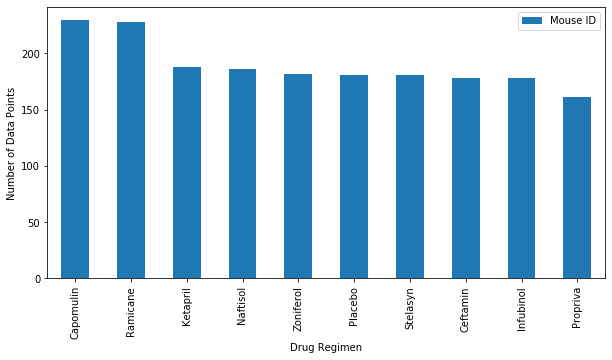

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# finding the number of mouse for each treatment regimen
data = df.groupby(["Drug Regimen"]).count()[["Mouse ID"]]
# create DataFrame
data_df = pd.DataFrame(data)
# sort the data frame 
data_df = data_df.sort_values(by = ["Mouse ID"],ascending=False)
# data_df.head()
# create bar plot of data
bar_plot = data_df.plot(kind = "bar",figsize=(10,5))
# set the y_label
bar_plot.set_ylabel("Number of Data Points")


Text(0, 0.5, 'Number of Data Points')

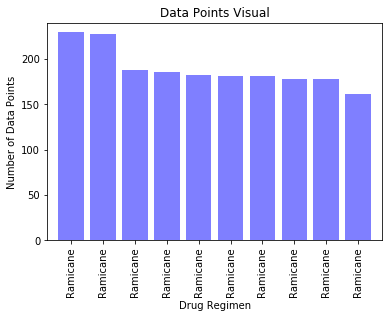

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# adjust x_axis
x_axis = np.arange(len(data_df))
tick_locations = [value for 
                  value in x_axis]
# create the bar plot
plt.bar(x_axis, data_df["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Drug Regimen"], rotation="vertical")

# set x_limit
plt.xlim(-0.75, len(x_axis)-0.25)
# set y_limit
plt.ylim(0, 240)

# set the title
plt.title("Data Points Visual")
# set the x_label
plt.xlabel("Drug Regimen")
# set the y_label
plt.ylabel("Number of Data Points")

## Pie plots

(-1.1045613723658971,
 1.1002172082078998,
 -1.1027130801595115,
 1.105172849624489)

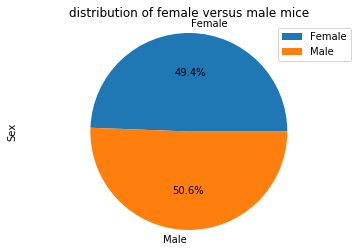

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# finding the number of data for each gender mice
Gender = df.groupby(["Sex"]).count()[["Tumor Volume (mm3)"]]

# create data frame
Gender_df = pd.DataFrame(Gender)
Gender_df.head()

# set the list for gender
gender_list = Gender_df.keys()

# create pie chart of data
Gender_pie = Gender_df.plot(kind="pie", y=gender_list, title=("distribution of female versus male mice"),autopct="%1.1f%%")

# set y_label
Gender_pie.set_ylabel("Sex")
# set adjustment for slices of pie
plt.axis("equal")


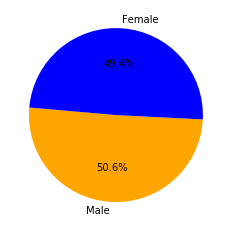

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set the sizes of each slices
sizes = ["50.6","49.4"]
# set the labels of each slices
labels=["Male","Female"]
# set the adjustment of distance of each slice
explode = [0,0]
# set the colors of each slice
colors= ["orange","blue"]

# create the pie plot
Gender_pie=plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",startangle=175)




## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimenes from the data frame in order 
best_regimes = df[df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# sorting the list by timepoint
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes
# reorganize the dataframe with which columns that I need
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# display the data frame
best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


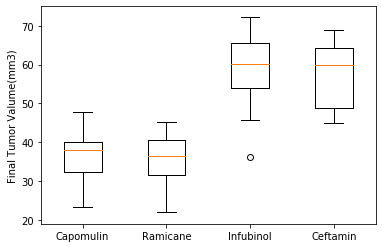

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens 
final_df = best_regimen_df.reset_index()
# finding a dictionary of lists of tumor volume for each regimen
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
# create dataframe
tumor_list_df = pd.DataFrame(tumor_lists)
# change the index to 4 top regimens
tumor_list_df = tumor_list_df.reindex(top_regimens)
# create a list of tumor volume column in dataframe 
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

# create box_plots
plt.boxplot(tumor_vols, labels=top_regimens)
# set y limits
plt.ylim(19, 75)
# set y labels
plt.ylabel("Final Tumor Valume(mm3)")
plt.show()


## Line and scatter plots

Text(0.5, 1.0, 'Capumolin Treatment of Mouse I509')

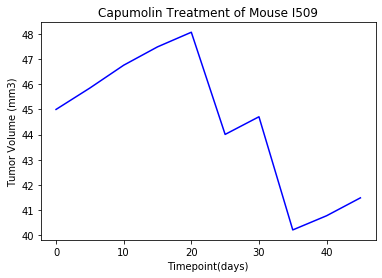

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# select the dataframe that mouse ids are I509
time_vs_tumer = df[df["Mouse ID"].isin(["l509"])]
#  select dataframe that regimens are campolin and mouse ids are I509
time_vs_tumer = time_vs_tumer[time_vs_tumer["Drug Regimen"].isin(["Capomulin"])]
time_vs_tumer
# reorganize the dataframe with selected columns
time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data
# reset the index
time_vs_tumer_data = time_vs_tumer_data.reset_index()

# set the x_axis and y_axis for plot
y_axis =time_vs_tumer_data["Tumor Volume (mm3)"]
x_axis = time_vs_tumer_data["Timepoint"]
# set the handel
handle, = plt.plot(x_axis,y_axis,color="blue")
# set the labels and title
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint(days)")
plt.title("Capumolin Treatment of Mouse I509")

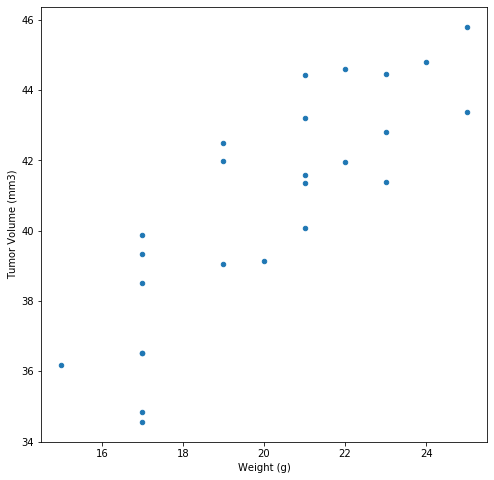

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# adjust the dataframe with the regimens are just capomulin
capomulin = df[df["Drug Regimen"].isin(["Capomulin"])]
# finding the average of "Tumor Volume (mm3)" for each weight and mouse id
capomulin_group = capomulin.groupby(["Weight (g)","Mouse ID"])["Tumor Volume (mm3)"].mean()
# create the dataframe
capomulin_df = pd.DataFrame(capomulin_group)
capomulin_df
# reset index of dataframe
capomulin_df= capomulin_df.reset_index()
capomulin_df
# create the scatter plot
capomulin_scatter = capomulin_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',figsize= (8,8))


The correlation between mouse weight and the average tumor volume is 0.84


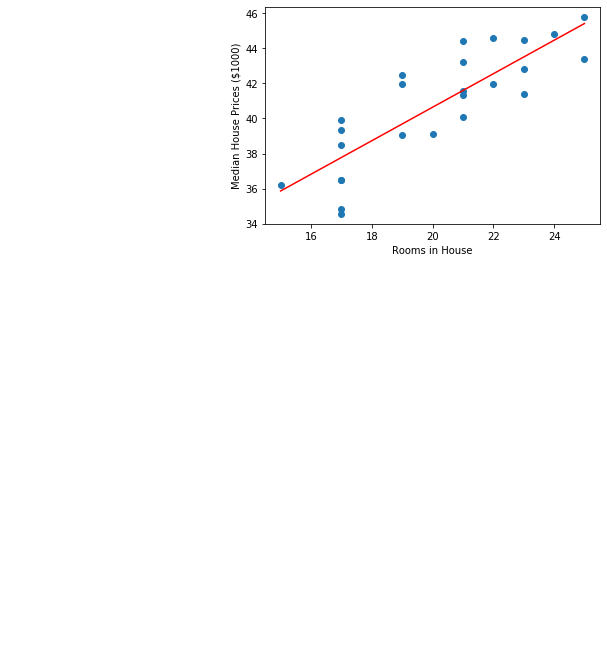

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# create the list of weight
weight = capomulin_df["Weight (g)"]
# create the list of average tumor
Avg_tumor= capomulin_df["Tumor Volume (mm3)"]
# calculating the correlation
correlation = st.pearsonr(weight,Avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# finding the slope and intercept to creating line plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,Avg_tumor)
# calculating the y_axis for line plot
regress_values =  weight* slope + intercept
# set the formula label for line plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# create the scatter plot
plt.scatter(weight,Avg_tumor)
# create the line plot
plt.plot(weight,regress_values,"r-")
# create the label formula with loc,fontsize and color
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# set the labels
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()